## Analytic Solution

In this section we implement a numeric solution to the diffusion equation. We have already found the analytic solution, which is 

$$
    \newcommand{\KeywordTok}[1]{\textcolor[rgb]{0.00,0.44,0.13}{\textbf{{#1}}}}
    \newcommand{\BuiltInTok}[1]{\textcolor[rgb]{0.00,0.44,0.13}{\textbf{{#1}}}}
    \newcommand{\OperatorTok}[1]{\textcolor[rgb]{0.00,0.44,0.13}{\textbf{{#1}}}}
    \newcommand{\ControlFlowTok}[1]{\textcolor[rgb]{0.00,0.44,0.13}{\textbf{{#1}}}}
    \newcommand{\ImportTok}[1]{\textcolor[rgb]{0.00,0.44,0.13}{\textbf{{#1}}}}
    \newcommand{\DataTypeTok}[1]{\textcolor[rgb]{0.56,0.13,0.00}{{#1}}}
    \newcommand{\qty}[1]
    {
        \left({#1}\right)
    }
    \newcommand{\qtys}[1]
    {
        \left[{#1}\right]
    }
$$
     

\begin{align}
	C_-(x,0) = C_b\qty{1-\frac{4}{\pi} \sum_n \frac{(-1)^m}{(2m+1)}\exp\qtys{-\qty{\frac{(2n+1)\pi}{2\delta}}^2\frac{D_- t}{\delta^2}}\cos\qty{\frac{(2m+1)\pi}{2} \frac{x}{\delta}}}.
	\label{eq:solution-diffusion}
\end{align}



In this section we will compute the diffusion equation numerically and add the chemical reaction as a border condition.

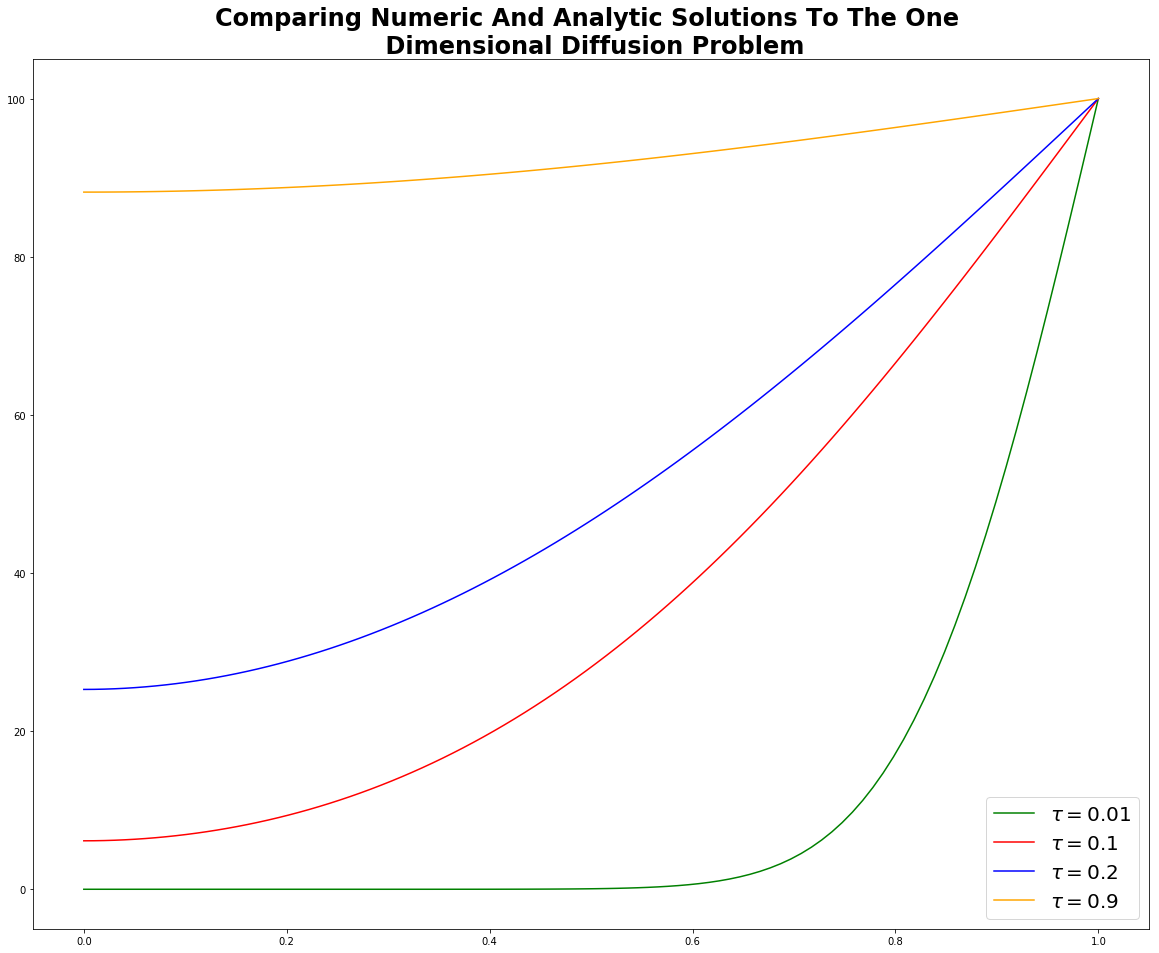

In [81]:
import analytic
import matplotlib.pyplot as plt
import numpy as np

M = 100
xi = np.linspace(0,1, M)

Cm = analytic.C_an

mw = 4
fs = 24
fig = plt.figure(figsize=(20,16))
plt.title('Comparing Numeric And Analytic Solutions To The One \n Dimensional Diffusion Problem', fontsize=fs, fontweight='bold')
plt.plot(xi, Cm(xi, 0.01), 'g-', label=r'$\tau=0.01$')
plt.plot(xi, Cm(xi, 0.1), 'r-', label=r'$\tau = 0.1$')
plt.plot(xi, Cm(xi, 0.2), 'b-', label = r'$\tau=0.2$')
plt.plot(xi, Cm(xi, 0.9), '-', color="orange", label = r'$\tau=0.9$')
plt.legend(fontsize = fs-4)
plt.savefig('../../../img/concentration-diffusiononly-comparison.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
plt.show()


## Numeric Solution

We will use an implicit scheme to find the numerical solution. This means that, in approaching the finite difference method, we will compute the spacial derivative at time step $n+1$. Consider the one dimensional diffusion equation

\begin{align}
\frac{\partial C}{\partial t} &= D \frac{\partial^2 C}{\partial x^2}.
\label{eq:diffusion}
\end{align}

We will define $x = \delta \xi$ where $\delta$ is the width of the laminar flow sheet. 

\begin{align}
\frac{\partial C}{\partial t} = \frac{D}{\delta^2} \frac{\partial^2 C}{\partial \xi^2},\\
\frac{\partial C}{\partial \tau} =  D \frac{\partial^2 C}{\partial \xi^2},
\end{align}

where we have defined $\tau = t/\delta^2$
We will discretize the derivative as follows,

\begin{align}
\frac{\partial C}{\partial \tau}^{n+1, k}= \frac{C^{n+1, k}-C^{n, k}}{\Delta \tau},\\
\frac{\partial^2 C}{\partial \xi^2}^{n+1, k} = \frac{C^{n+1, k-1}-2C^{n, k}+C^{n+1, k+1}}{\Delta \xi^2}.
\end{align}

Replacing these approximations into equation \ref{eq:diffusion} we get

\begin{align}
    -\alpha \rho^{n+1,k-1} + ( 1 + 2\alpha ) \rho^{n+1,k} -\alpha \rho^{n+1,k+1} =  \rho^{n,k}\\
    k \in [1, ... , m-1]
    \label{eq:equations-n}
\end{align}

In particular, for a given $n$ value,  the equations for $k=1$ and $k=m-1$ (which include the border conditions) are

\begin{align}
    -\alpha \rho^{n+1,0} + ( 1 + 2\alpha ) \rho^{n+1,1} -\alpha \rho^{n+1,2} = \rho^{n,1},\\
    -\alpha \rho^{n+1,m-2} + ( 1 + 2\alpha ) \rho^{n+1,m-1} -\alpha \rho^{n+1,m} = \rho^{n,m-1}.
    \label{eq:border-equations}
\end{align}

The border conditions for our system (in discretized form) are

\begin{align}
    \rho^{n, 0} = \rho^{n, 1}, \\
    \rho^{n, m-1} = 0.
\end{align}

Therefore, equations \ref{eq:border-equations} yield

\begin{align}
    ( 1 + \alpha ) \rho^{n+1,1} -\alpha \rho^{n+1,2} = \rho^{n,1},\\
    -\alpha \rho^{n+1,m-2} + ( 1 + 2\alpha ) \rho^{n+1,m-1} = \rho^{n,m-1}.
\end{align}

We want to put these equations in matrix form. Let 

\begin{align}
    \bf{\rho^n} = \begin{bmatrix}
                    \rho^{n, 0} \\
                    \rho^{n, 1} \\
                    \vdots \\
                    \rho^{n, m-1} \\
                    \rho^{n, m} \\
                    \end{bmatrix},
\end{align}

and 

\begin{align}
\bf{\underline{A}} &= \begin{bmatrix}
           ( 1 + \alpha ) & -\alpha  &  0 & 0 &  \cdots & 0\\
             -\alpha & ( 1 + 2 \alpha ) & -\alpha & \cdots & 0 & 0\\
           \vdots  &\cdots  & \ddots & \ddots &  \ddots&  \\
            \vdots & \cdots & 0  &  -\alpha & ( 1 + 2 \alpha ) & -\alpha \\
            0 & \cdots &0  & 0 & -\alpha & ( 1 + 2 \alpha )
         \end{bmatrix}
         \label{eq:discretization-matrix}.
\end{align}

Equations \ref{eq:equations-n} can be expressed as

\begin{align}
    \bf{\underline{A}} \bf{\rho^{n+1}}  = \bf{\rho^n} .
\end{align}

Considering the initial conditions \ref{eq:initial-condition}, we get

\begin{align}
    \bf{\rho^{0,k}} = -C_b, \\
    k \in [1,..., m-1].
\end{align}

Now we are ready to start iterating this matrix equation to get the time evolution.

We will use the parameters $\xi = x/\delta$ and $\tau = t/\delta^2$ as the parameters of the equation.


In [103]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Define grid parameters
D = 1.07 # Diffusion Coefficient
N = 100
tau = np.linspace(0,1, N) #shape is N+1

dt = 1/(N)  # N Partitions
dx = 1/(M) # N Partitions 
a = dt / dx ** 2 * D

# Define the coefficient matrix
di = ( 1 + 2 * a ) * np.ones(M-2)
di[0] = ( 1 + a )
A = diags(np.array([- a * np.ones(M-3), di, - a * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
A_inv = np.asarray(np.linalg.inv(A))






In [104]:
def C(t):
    # Set up initial conditions for \rho
    Cb = 100

    rho = np.zeros([N, M])

    rho[0, :] = - Cb
    rho[0, :] = - Cb
    rho[:, -1] = 0    
    rho[:, 0] = rho[:, 1]
    
    #Starting iteration
    for n in range(0, N-1):
        rho[n+1, 1:M-1] = np.matmul(A_inv, rho[n, 1:M-1])
        rho[n+1, 0] = rho[n+1, 1]
        
    n = int(t/dt)
    
    return Cb * np.ones(M) + rho[n, :]
            

# Comparison With Numerical Results
We will import the analytical solution and compare it with the numerical results for eacht $\tau$


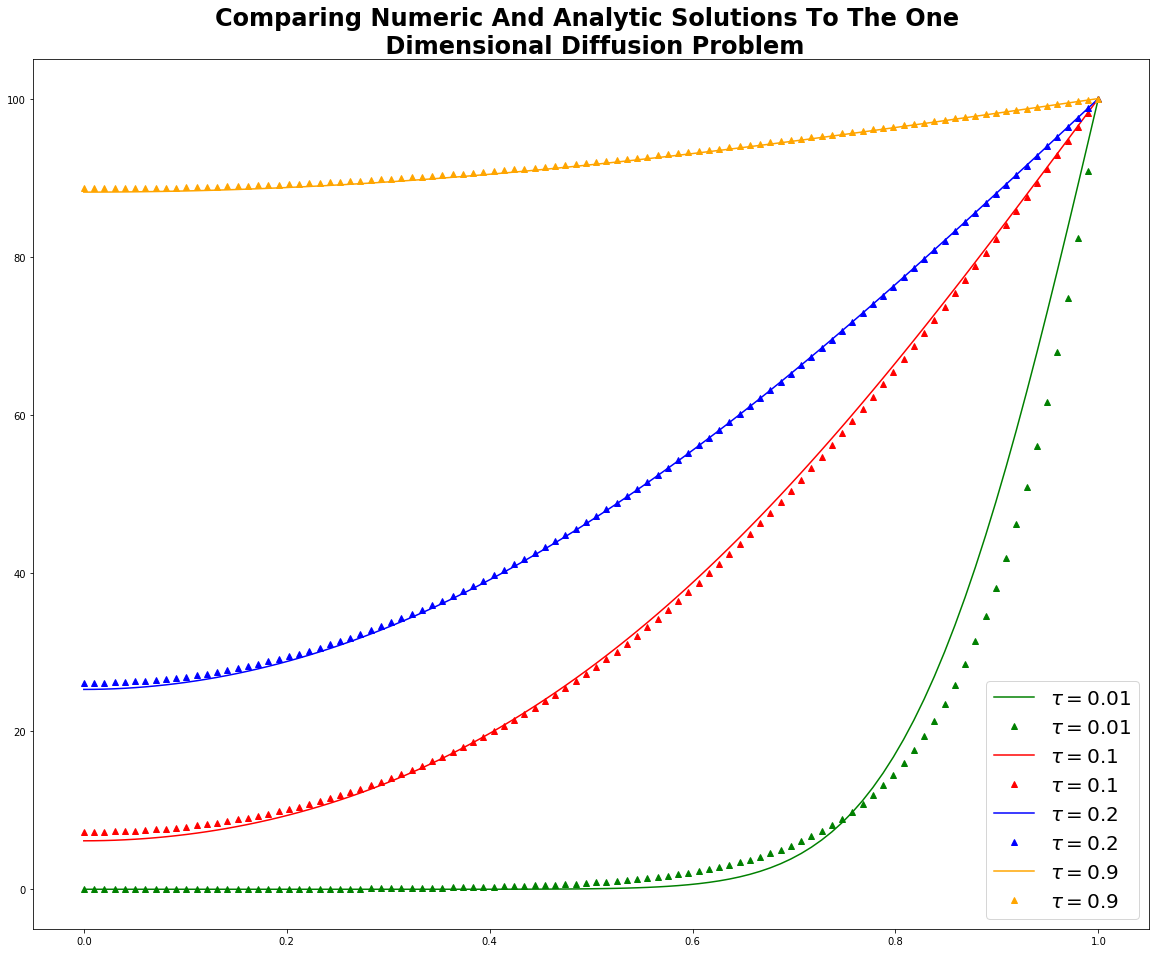

In [102]:
#Cm is the imported analytical solution

mw = 4
fs = 24
fig = plt.figure(figsize=(20,16))
plt.title('Comparing Numeric And Analytic Solutions To The One \n Dimensional Diffusion Problem', fontsize=fs, fontweight='bold')
plt.plot(xi, Cm(xi, 0.01), 'g-', label=r'$\tau=0.01$')
plt.plot(xi, C(0.01), 'g^', label=r'$\tau=0.01$')
plt.plot(xi, Cm(xi, 0.1), 'r-', label=r'$\tau = 0.1$')
plt.plot(xi, C(0.1), 'r^', label=r'$\tau = 0.1$')
plt.plot(xi, Cm(xi, 0.2), 'b-', label = r'$\tau=0.2$')
plt.plot(xi, C(0.2), 'b^', label = r'$\tau=0.2$')
plt.plot(xi, Cm(xi, 0.9), '-', color="orange", label = r'$\tau=0.9$')
plt.plot(xi, C(0.9), '^', color="orange", label = r'$\tau=0.9$')
plt.legend(fontsize = fs-4)
plt.show()


$\Delta$ marks are the numeric values and continuous lines are the analytical values.